<a href="https://colab.research.google.com/github/MK316/gradio/blob/main/stt_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In progress: (It failed in the last code) 22.05. 21

In [ ]:
# load model and tokenizer
!pip install transformers
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

!pip install datasets
from datasets import load_dataset

# load dummy dataset and read soundfiles
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")

# tokenize
input_values = processor(ds[0]["audio"]["array"], return_tensors="pt", padding="longest").input_values  # Batch size 1

# retrieve logits
logits = model(input_values).logits

# take argmax and decode
import torch
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

'BECAUSE YOU ARE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BAW WHILE POOR SHAGGY SITS THERE A COOING DOVE'

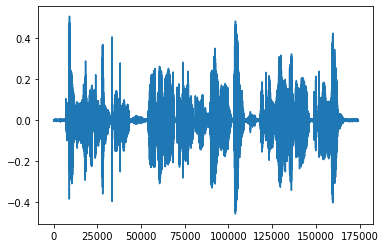

In [2]:
# figure out how the model works
processor
s = ds[0]["audio"]["array"]
import matplotlib.pyplot as plt
plt.plot(s)
transcription[0]

In [ ]:
!pip install librosa
def stt (audio):

  # normalize signal from gradio mic
  import numpy as np
  sig = audio[1]/np.max(np.abs(audio[1]))

  # resample 44100Hz(from gradio mic) to 16000Hz(trained on this model)
  import librosa
  sig = librosa.resample(sig, orig_sr=audio[0], target_sr=16000)

  # load model and tokenizer
  processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
  model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

  # tokenize
  input_values = processor(sig, return_tensors="pt", padding="longest").input_values  # Batch size 1

  # retrieve logits
  logits = model(input_values).logits

  # take argmax and decode
  import torch
  predicted_ids = torch.argmax(logits, dim=-1)
  transcription = processor.batch_decode(predicted_ids)
  return transcription[0]

In [ ]:
# IT Failed

# !pip install gradio
# import gradio as gr
# iface = gr.Interface(stt, inputs = ["mic"], outputs = ["text"])
# iface.launch(debug=True)